In [6]:
import matplotlib.pyplot as plt 
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [15]:
import pandas as pd
df = pd.read_html(url)
mars_temp_df = df[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
mars_temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [17]:
mars_data_df = mars_temp_df.copy()

In [19]:

mars_data_df['terrestrial_date'] =  pd.to_datetime(mars_data_df['terrestrial_date'], format='%Y/%m/%d')

In [20]:
mars_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [21]:
mars_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:

mars_data_df[mars_data_df['month']==mars_data_df['month'].max()]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
248,263,2013-06-05,295,330,12,-71.0,853.0
249,264,2013-06-06,296,330,12,-71.0,850.0
250,265,2013-06-07,297,331,12,-72.0,849.0
251,266,2013-06-08,298,331,12,-72.0,850.0
252,267,2013-06-09,299,332,12,-71.0,849.0
...,...,...,...,...,...,...,...
1574,1600,2017-05-01,1683,357,12,-75.0,837.0
1575,1604,2017-05-02,1684,358,12,-75.0,837.0
1576,1605,2017-05-03,1685,358,12,-77.0,838.0
1577,1607,2017-05-04,1686,359,12,-75.0,838.0


In [23]:
maxMonth = mars_data_df['month'].max()
maxMonth

12

In [24]:

maxSol = mars_data_df['sol'].max()
maxSol

1977

In [25]:
# Get the answer by averaging the minimum daily temperature of all the months.
avg_temp = mars_data_df.groupby(by = "month").mean()
avg_temp2 = avg_temp.loc[:,["min_temp"]].sort_values(["month"])

In [26]:
avg_temp2

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


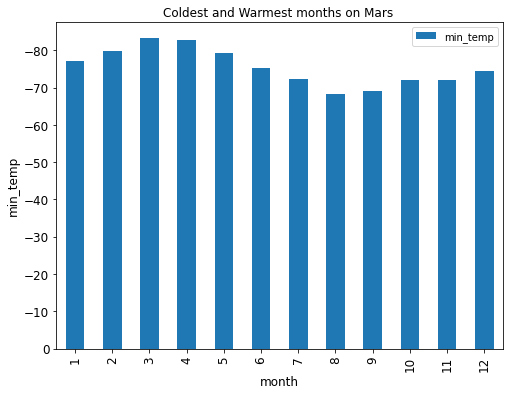

In [27]:
# Plot the results as a bar chart.
ax = avg_temp2[['min_temp']].plot(kind='bar', title ="Coldest and Warmest months on Mars ", figsize=(8, 6), legend=True, fontsize=12)
ax.set_xlabel("month", fontsize=12)
ax.set_ylabel("min_temp", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

In [28]:
# Get the answer by averaging the daily atmospheric pressure of all the months.
avg_pressure2 = mars_data_df.groupby(by = "month").mean()
avg_pressure3 = avg_pressure2.loc[:,["pressure"]].sort_values(["month"])

In [29]:
avg_pressure3

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


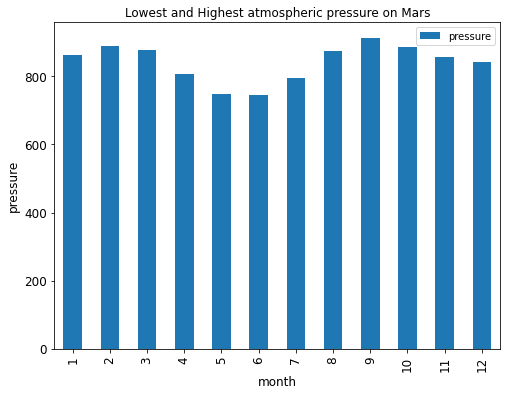

In [31]:
# Plot the results as a bar chart.
ax = avg_pressure2[['pressure']].plot(kind='bar', title ="Lowest and Highest atmospheric pressure on Mars", figsize=(8, 6), legend=True, fontsize=12)
ax.set_xlabel("month", fontsize=12)
ax.set_ylabel("pressure", fontsize=12)
plt.show()

In [32]:
# Export the DataFrame as a CSV file using encoding='utf8'.
mars_temp_df.to_csv(r"C:\Users\diego\OneDrive\Desktop\Rice Class\Mission_to_Mars\mars_temp.csv", encoding="utf-8", index=False)

In [33]:

ls = mars_data_df.groupby(by = "ls").min()
ls2 = ls.loc[:,["terrestrial_date"]].sort_values(["ls"])

In [34]:
ls2

,terrestrial_date
ls,
0,2013-08-01
1,2013-08-03
2,2013-08-05
3,2013-08-07
4,2015-06-28
...,...
355,2013-07-22
356,2013-07-24
357,2013-07-26


In [35]:
ls2.dtypes

terrestrial_date    datetime64[ns]
dtype: object

In [36]:
from datetime import date
f_date = date(2013, 8, 1)
l_date = date(2015, 6, 18)
delta = l_date - f_date
print(delta.days)

686
